In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import numpy as np
import time

In [3]:
from rxrmask.core import (
    Atom,
    Structure,
    FormFactorLocalDB,
    ParametersContainer,
    FormFactorModel,
    FormFactorVacancy,
    create_compound,
)
from rxrmask.utils import (
    plot_reflectivity,
    plot_energy_scan,
    plot_density_profile,
    get_density_profile_from_element_data,
)
from rxrmask.backends import (
    PRReflectivityBackend,
    PRParallelReflectivityBackend,
)

In [4]:
mn_ff = FormFactorLocalDB(element="Mn", is_magnetic=False)
o_ff = FormFactorLocalDB(element="O", is_magnetic=False)
sr_ff = FormFactorLocalDB(element="Sr", is_magnetic=False)
ti_ff = FormFactorLocalDB(element="Ti", is_magnetic=False)
c_ff = FormFactorLocalDB(element="C", is_magnetic=False)
la_ff = FormFactorLocalDB(element="La", is_magnetic=False)

la_atom = Atom(
    Z=57,
    name="La",
    ff=la_ff,
)
mn_atom = Atom(
    Z=25,
    name="Mn",
    ff=mn_ff,
)
o_atom = Atom(
    Z=8,
    name="O",
    ff=o_ff,
)
sr_atom = Atom(
    Z=38,
    name="Sr",
    ff=sr_ff,
)
ti_atom = Atom(
    Z=22,
    name="Ti",
    ff=ti_ff,
)
c_atom = Atom(
    Z=6,
    name="C",
    ff=c_ff,
)
x1_atom = Atom(
    Z=0,
    name="X1",
    # ff=FormFactorVacancy(),
    ff=c_ff,
)
x2_atom = Atom(
    Z=0,
    name="X2",
    # ff=FormFactorVacancy(),
    ff=c_ff,
)

In [5]:
parameters_container = ParametersContainer()

comp_SrTiO3 = create_compound(
    parameters_container=parameters_container,
    name="SrTiO3",
    formula="Sr:1,Ti:1,O:3",
    thickness=50.0,
    density=5.12,
    atoms=[sr_atom, ti_atom, o_atom],
    roughness=0.0,
    prev_roughness=0.0,
    linked_prev_roughness=False,
)
comp_LaMnO3 = create_compound(
    parameters_container=parameters_container,
    name="LaMnO3",
    formula="La:1,Mn:1,O:3",
    thickness=10.0,
    density=6.52,
    atoms=[la_atom, mn_atom, o_atom],
    roughness=4.0,
    prev_roughness=0.0,
    linked_prev_roughness=False,
)
comp_CCO = create_compound(
    parameters_container=parameters_container,
    name="CO2",
    formula="X1:1,X2:1,O:2",
    thickness=10.0,
    density=5.0,
    atoms=[x1_atom, x2_atom, o_atom],
    roughness=4.0,
    prev_roughness=0.0,
    linked_prev_roughness=True,
)

struc = Structure(name=f"Test Structure", n_compounds=3, params_container=parameters_container)
struc.add_compound(0, comp_SrTiO3)
struc.add_compound(1, comp_LaMnO3)
struc.add_compound(2, comp_CCO)
struc.validate_compounds()


comp_CCO.compound_details[0].thickness.set(15.0)
comp_CCO.compound_details[0].molar_density.set(0.0)
comp_CCO.compound_details[0].roughness.set(0.0)

comp_CCO.compound_details[1].thickness.set(9.0)
comp_CCO.compound_details[1].molar_density.set(0.075)
comp_CCO.compound_details[1].roughness.set(4.0)

comp_CCO.compound_details[2].thickness.set(6.0)
comp_CCO.compound_details[2].molar_density.set(0.055)
comp_CCO.compound_details[2].roughness.set(4.0)


struc.create_layers(step=0.1)

In [29]:
struc.print_details()

Structure: Test Structure
Number of compounds: 3
Number of layers: 900
Compound 0: SrTiO3
  Thickness: Parameter(value=50.0, id=15, name='SrTiO3-thickness', min_value=None, max_value=None, fit=False) Angstrom
  Density: Parameter(value=5.12, id=16, name='SrTiO3-density', min_value=None, max_value=None, fit=False) g/cm³
  Magnetic Density: Parameter(value=0.0, id=17, name='SrTiO3-magnetic_density', min_value=None, max_value=None, fit=False) mol/cm³
  Roughness: Parameter(value=0.0, id=18, name='SrTiO3-roughness', min_value=None, max_value=None, fit=False) Angstrom
  Previous Roughness: Parameter(value=0.0, id=19, name='SrTiO3-prev_roughness', min_value=None, max_value=None, fit=False) Angstrom
Compound 1: LaMnO3
  Thickness: Parameter(value=10.0, id=35, name='LaMnO3-thickness', min_value=None, max_value=None, fit=False) Angstrom
  Density: Parameter(value=6.52, id=36, name='LaMnO3-density', min_value=None, max_value=None, fit=False) g/cm³
  Magnetic Density: Parameter(value=0.0, id=37, 

In [31]:
comp_SrTiO3.print_details()
comp_LaMnO3.print_details()
comp_CCO.print_details()

Compound: SrTiO3
  Formula: Sr:1,Ti:1,O:3
  Thickness: 50.0 Angstrom
  Density: 5.12 g/cm³
  Magnetic Density: 0.0 g/cm³
  Roughness: 0.0 Angstrom
  Previous Roughness: 0.0 Angstrom
  Linked Previous Roughness: False
  Magnetic: No
  Detail - 0: Sr - 1 50.0 Angstrom 0.0 Angstrom 0.0 Angstrom 0.027899140248760067 mol/cm³ 0.0 mol/cm³
  Detail - 1: Ti - 1 50.0 Angstrom 0.0 Angstrom 0.0 Angstrom 0.027899140248760067 mol/cm³ 0.0 mol/cm³
  Detail - 2: O - 3 50.0 Angstrom 0.0 Angstrom 0.0 Angstrom 0.0836974207462802 mol/cm³ 0.0 mol/cm³
Compound: LaMnO3
  Formula: La:1,Mn:1,O:3
  Thickness: 10.0 Angstrom
  Density: 6.52 g/cm³
  Magnetic Density: 0.0 g/cm³
  Roughness: 4.0 Angstrom
  Previous Roughness: 0.0 Angstrom
  Linked Previous Roughness: False
  Magnetic: No
  Detail - 0: La - 1 10.0 Angstrom 4.0 Angstrom 0.0 Angstrom 0.026959784024012397 mol/cm³ 0.0 mol/cm³
  Detail - 1: Mn - 1 10.0 Angstrom 4.0 Angstrom 0.0 Angstrom 0.026959784024012397 mol/cm³ 0.0 mol/cm³
  Detail - 2: O - 3 10.0 Angs

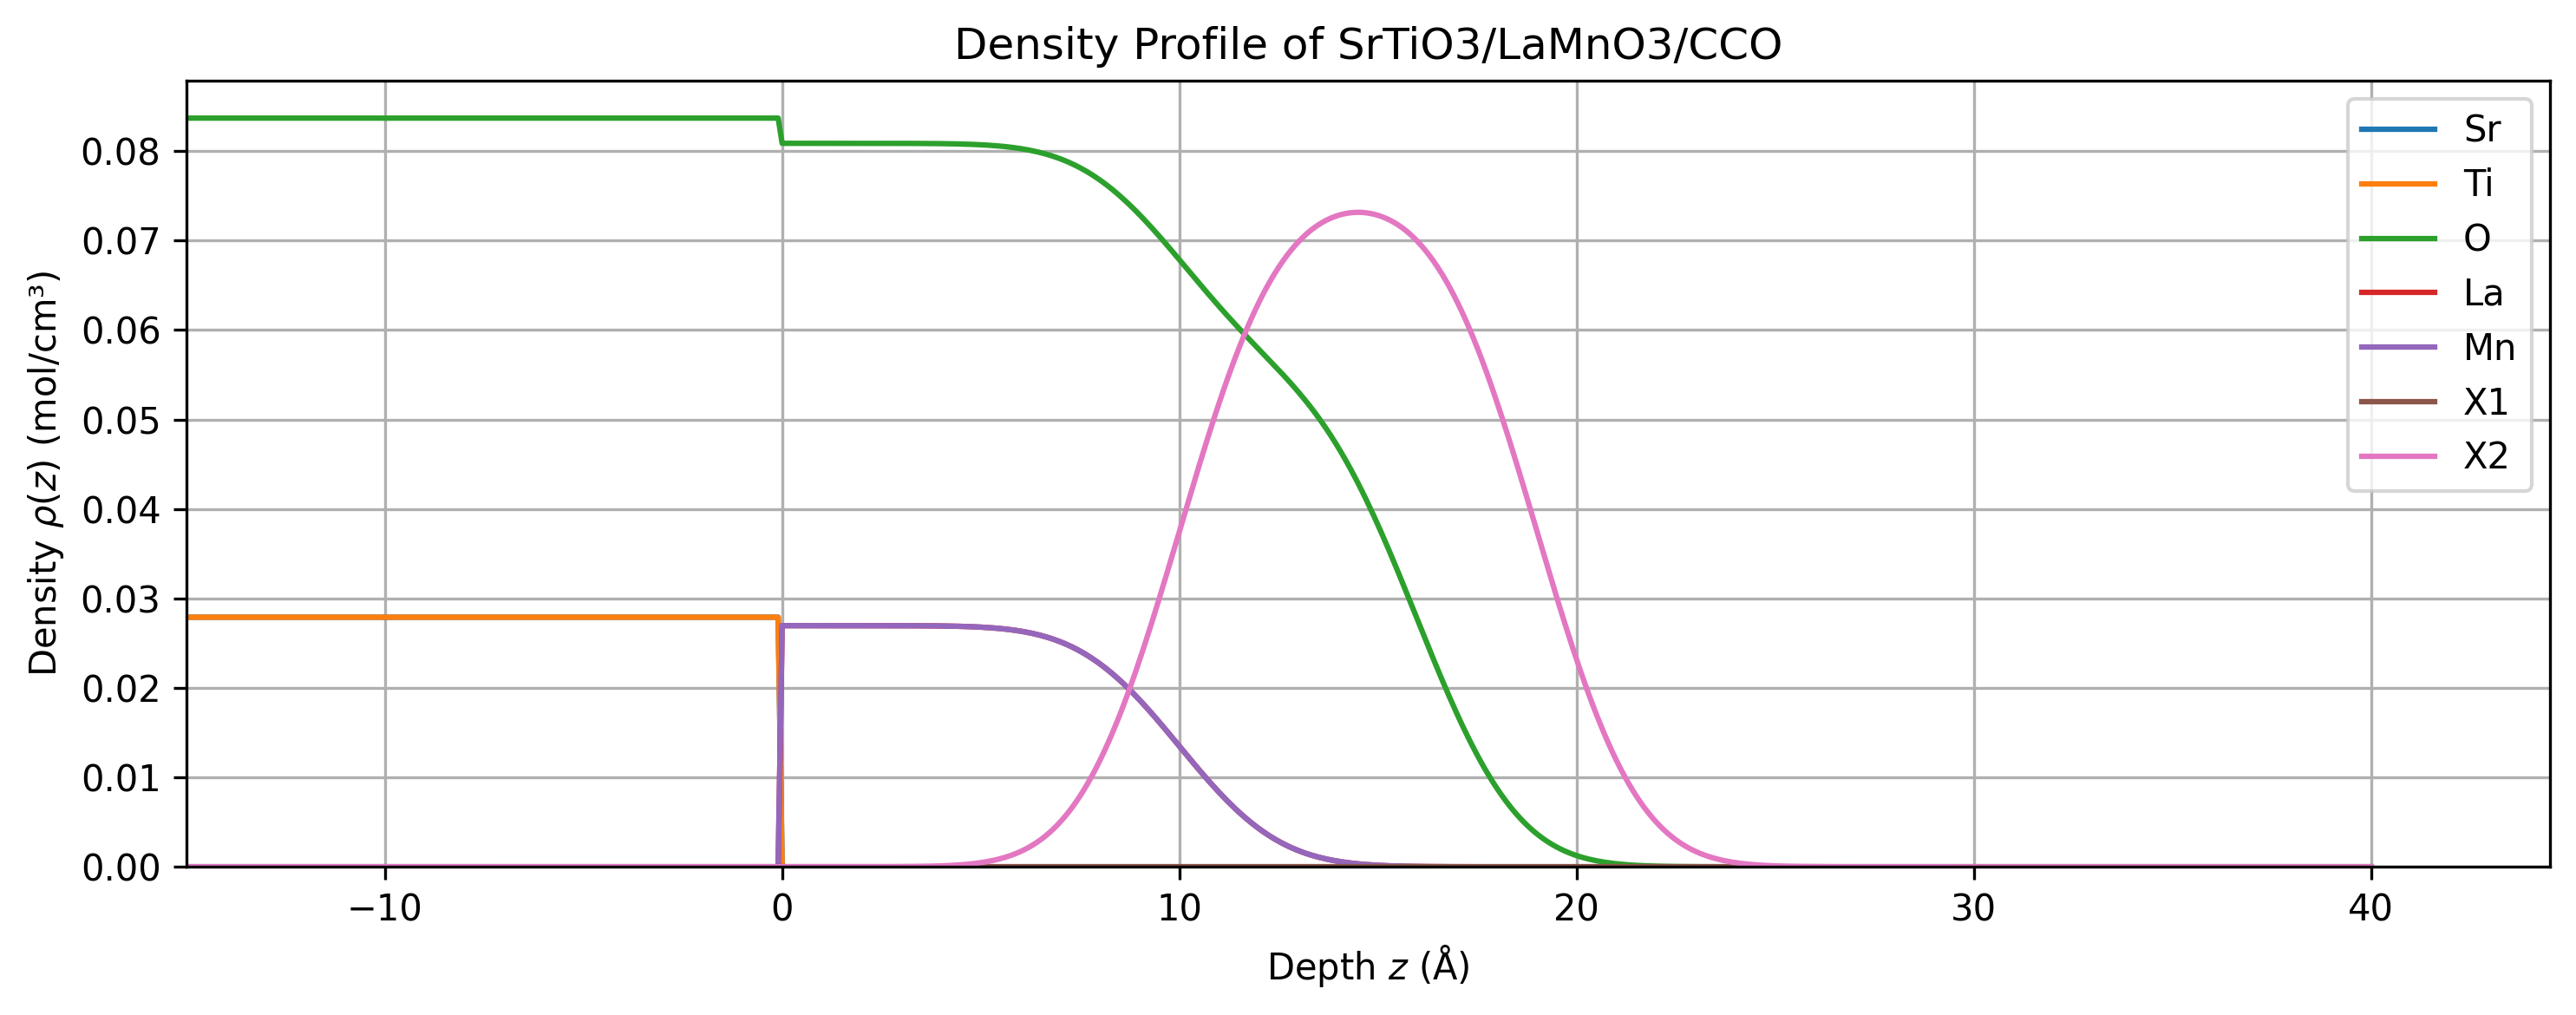

In [ ]:
z, dens, m_dens, _ = get_density_profile_from_element_data(
    struc.element_data, struc.atoms, struc.step
)
plot_density_profile(
    z, dens, title="Density Profile of SrTiO3/LaMnO3/CCO", x_move=-50.0, min_x=-15.0
)

Number of segments: 193
Tiempo de ejecución: 0.071 segundos


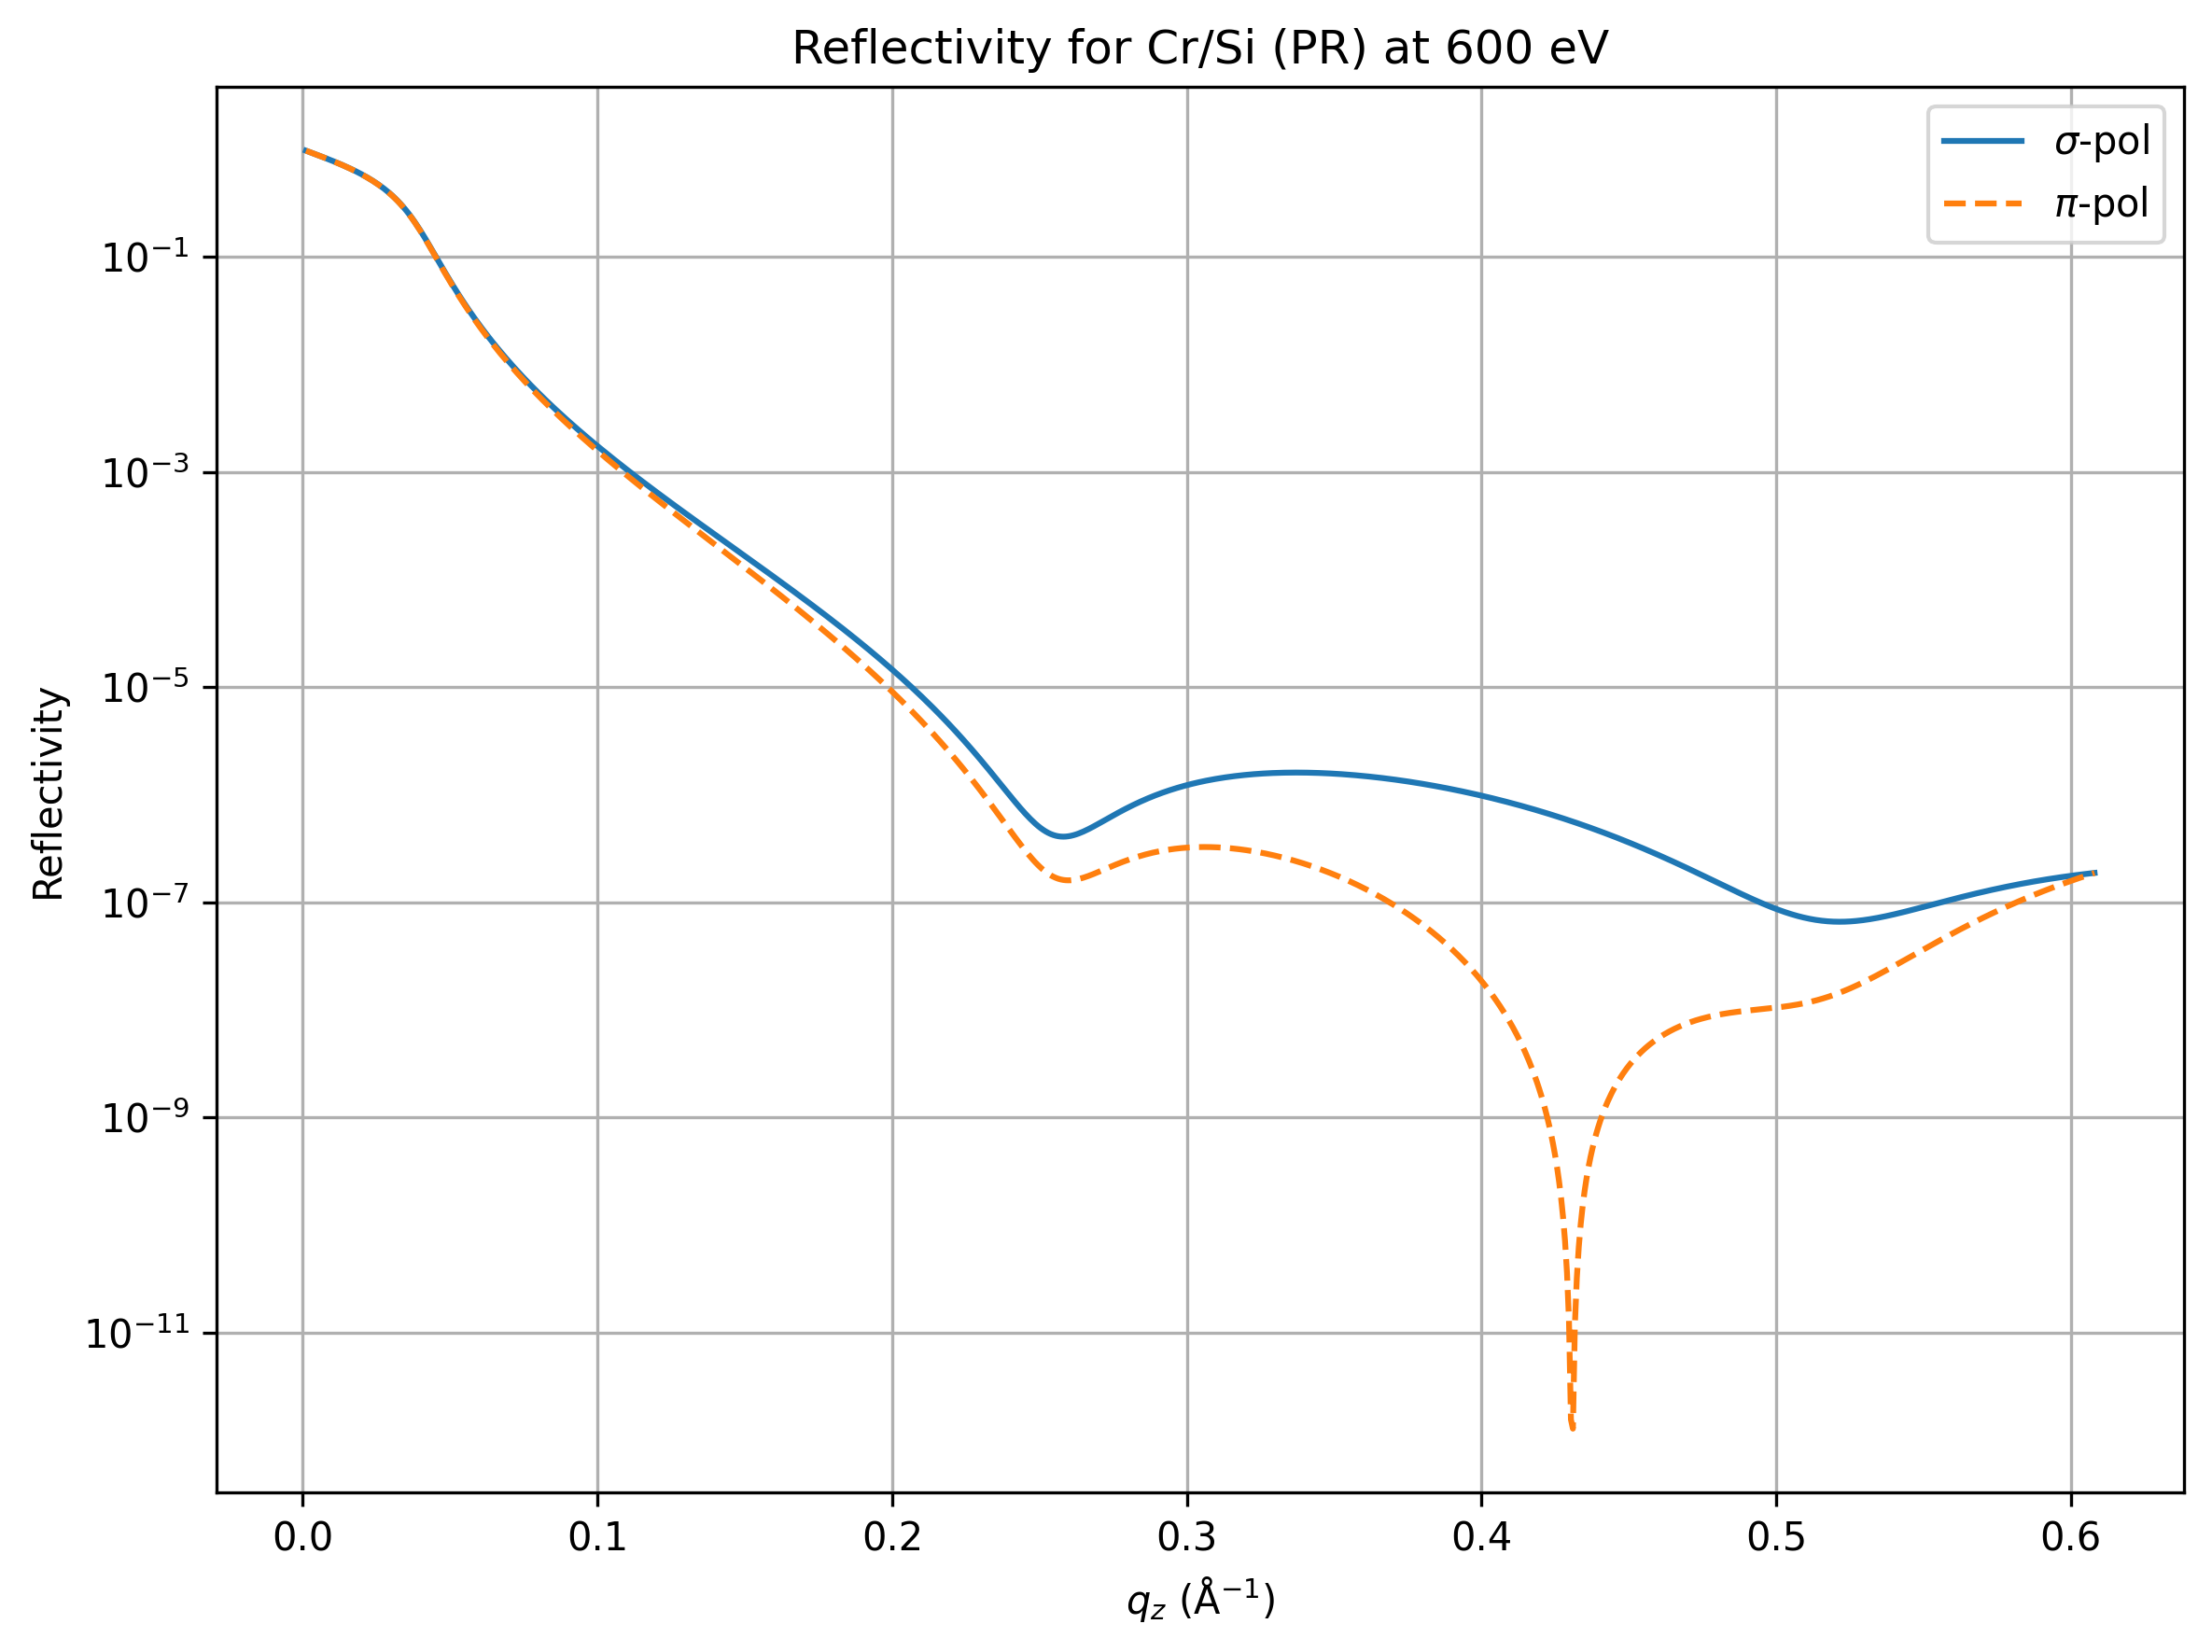

In [10]:
backend = PRReflectivityBackend()

start_time = time.time()
E_eV = 600
Theta = np.linspace(0.1, 89.1, num=1001)
qz = np.sin(Theta * np.pi / 180) * (E_eV * 0.001013546143)
res = backend.compute_reflectivity(struc, qz, E_eV)
end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time:.3f} segundos")
plot_reflectivity(qz, res.R_s, res.R_p, E_eV, "Cr/Si (PR)")

Tiempo de ejecución: 0.370 segundos


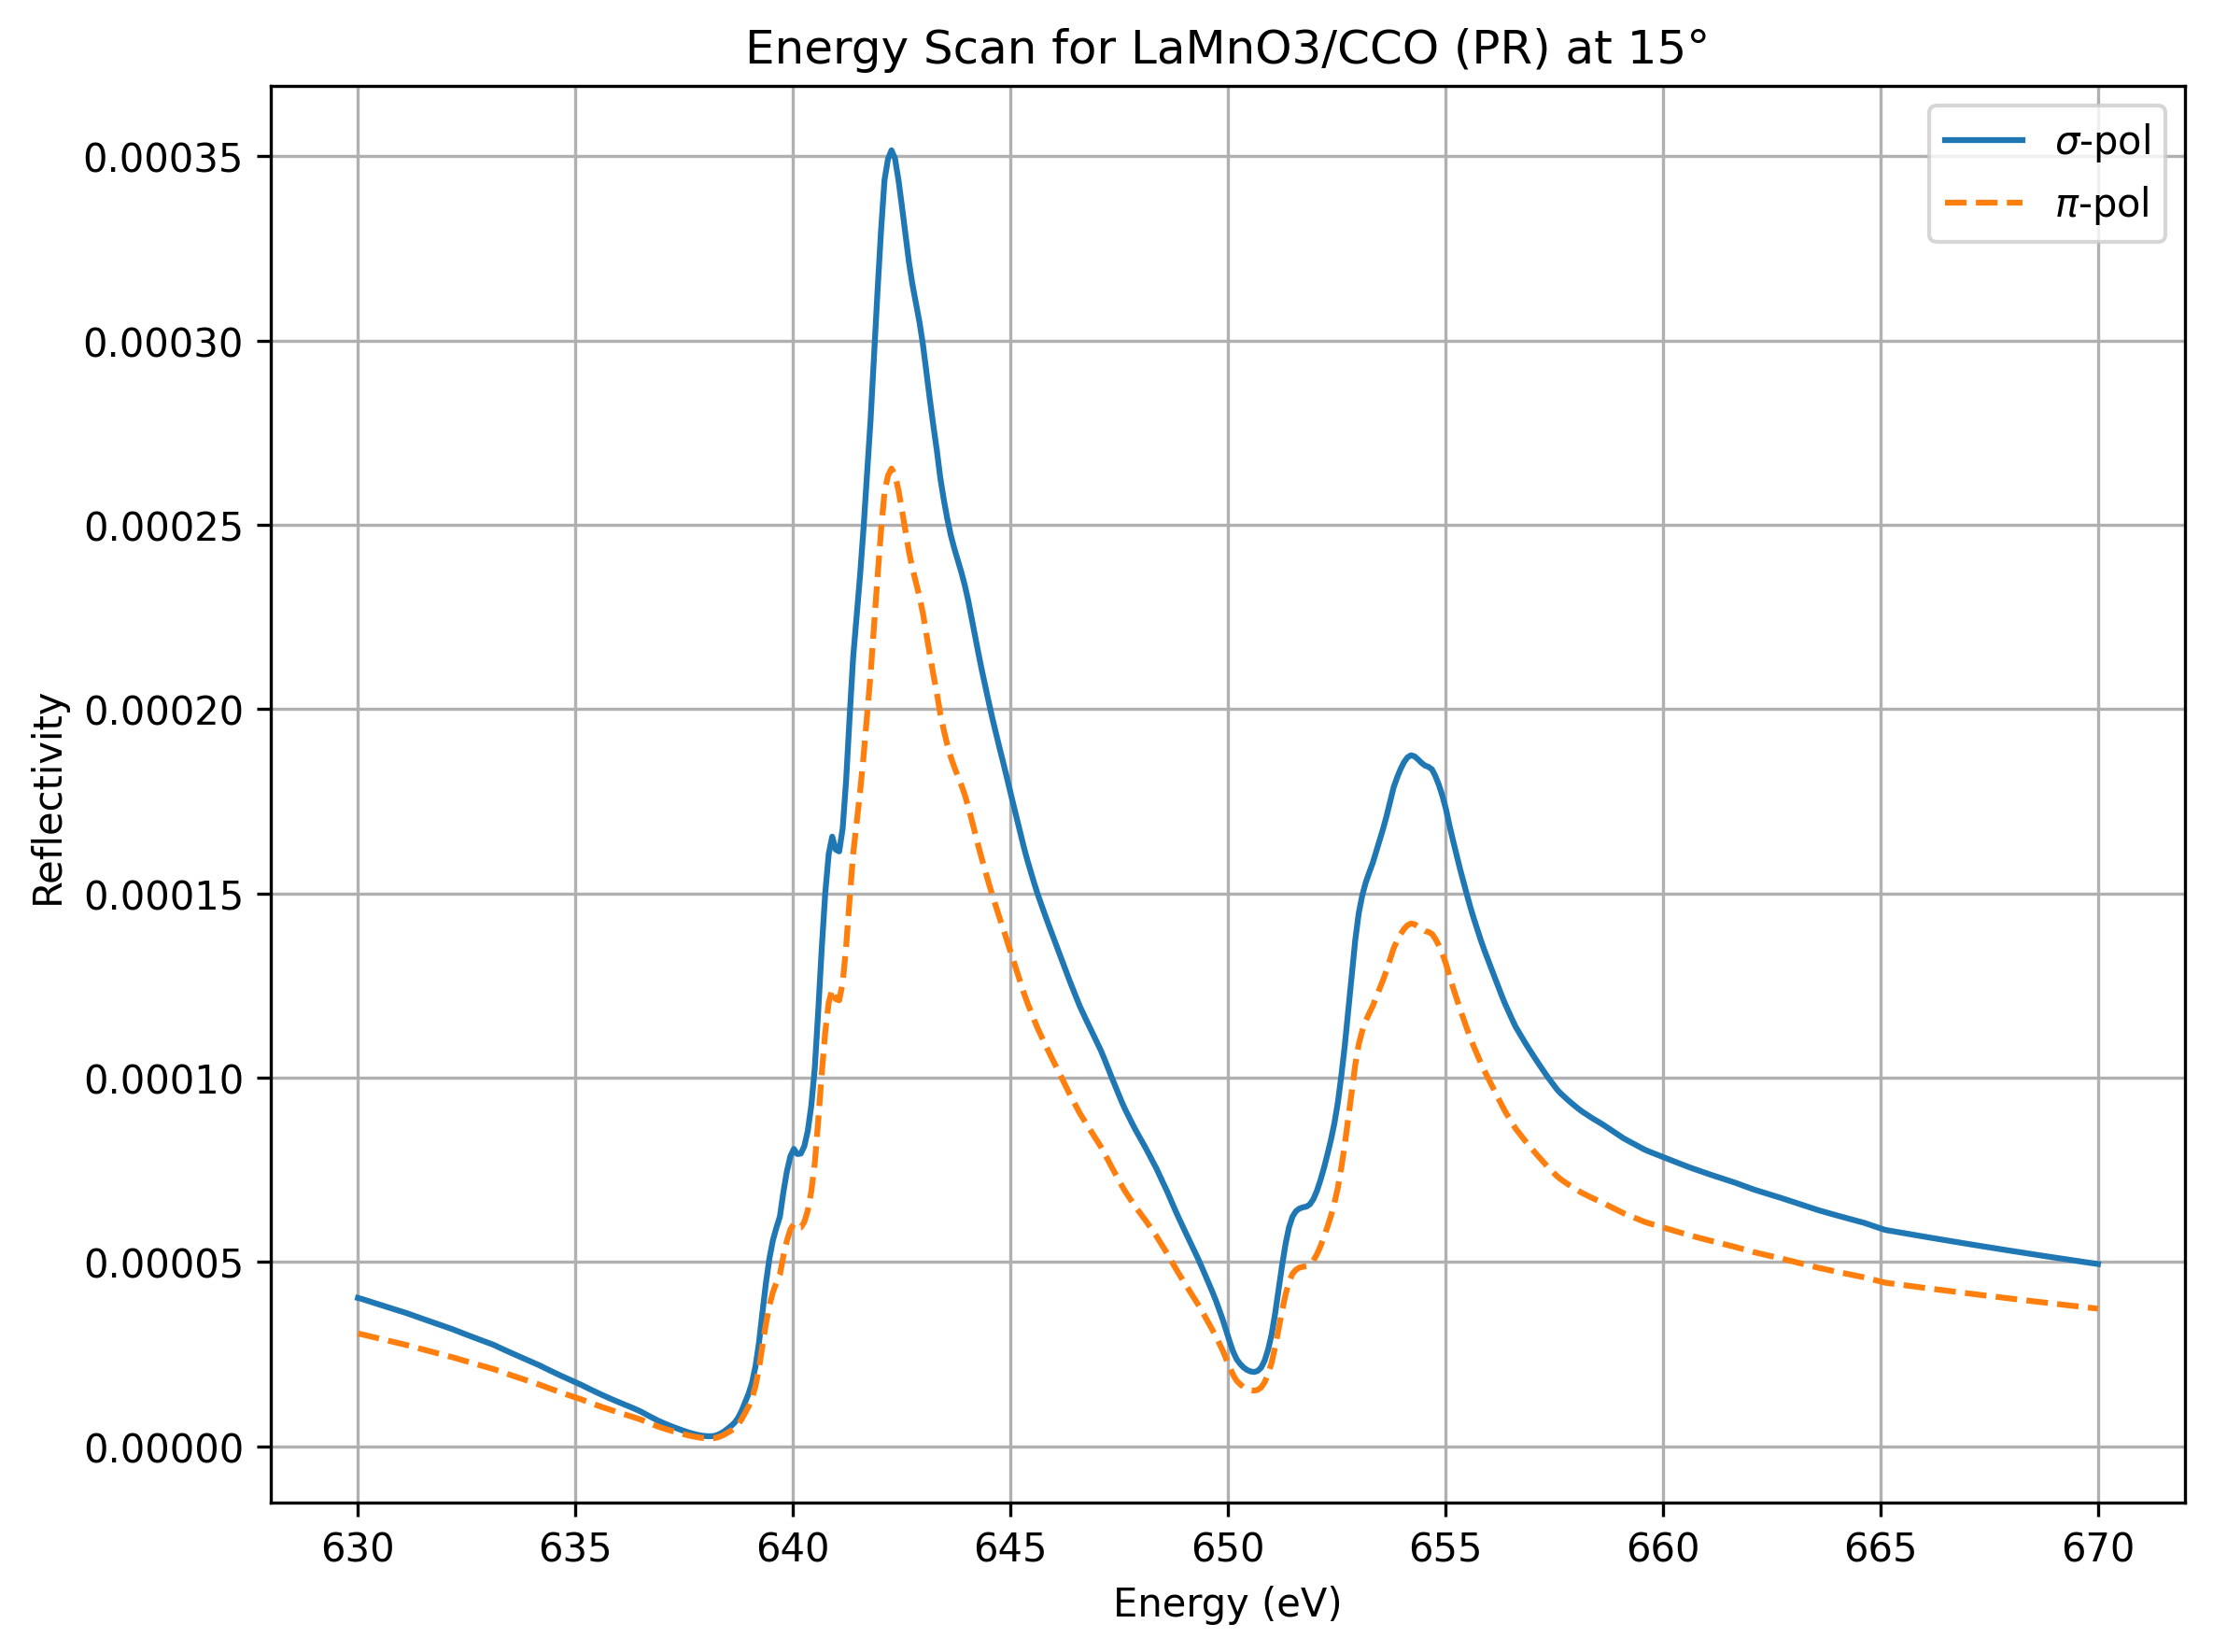

In [12]:
start_time = time.time()

theta_deg = 15
e_evs = np.linspace(630, 670, num=500).tolist()
res_energy = backend.compute_energy_scan(struc, e_evs, theta_deg)
end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time:.3f} segundos")
plot_energy_scan(res_energy.energy_range, res_energy.R_s, res_energy.R_p, theta_deg, "LaMnO3/CCO (PR)")

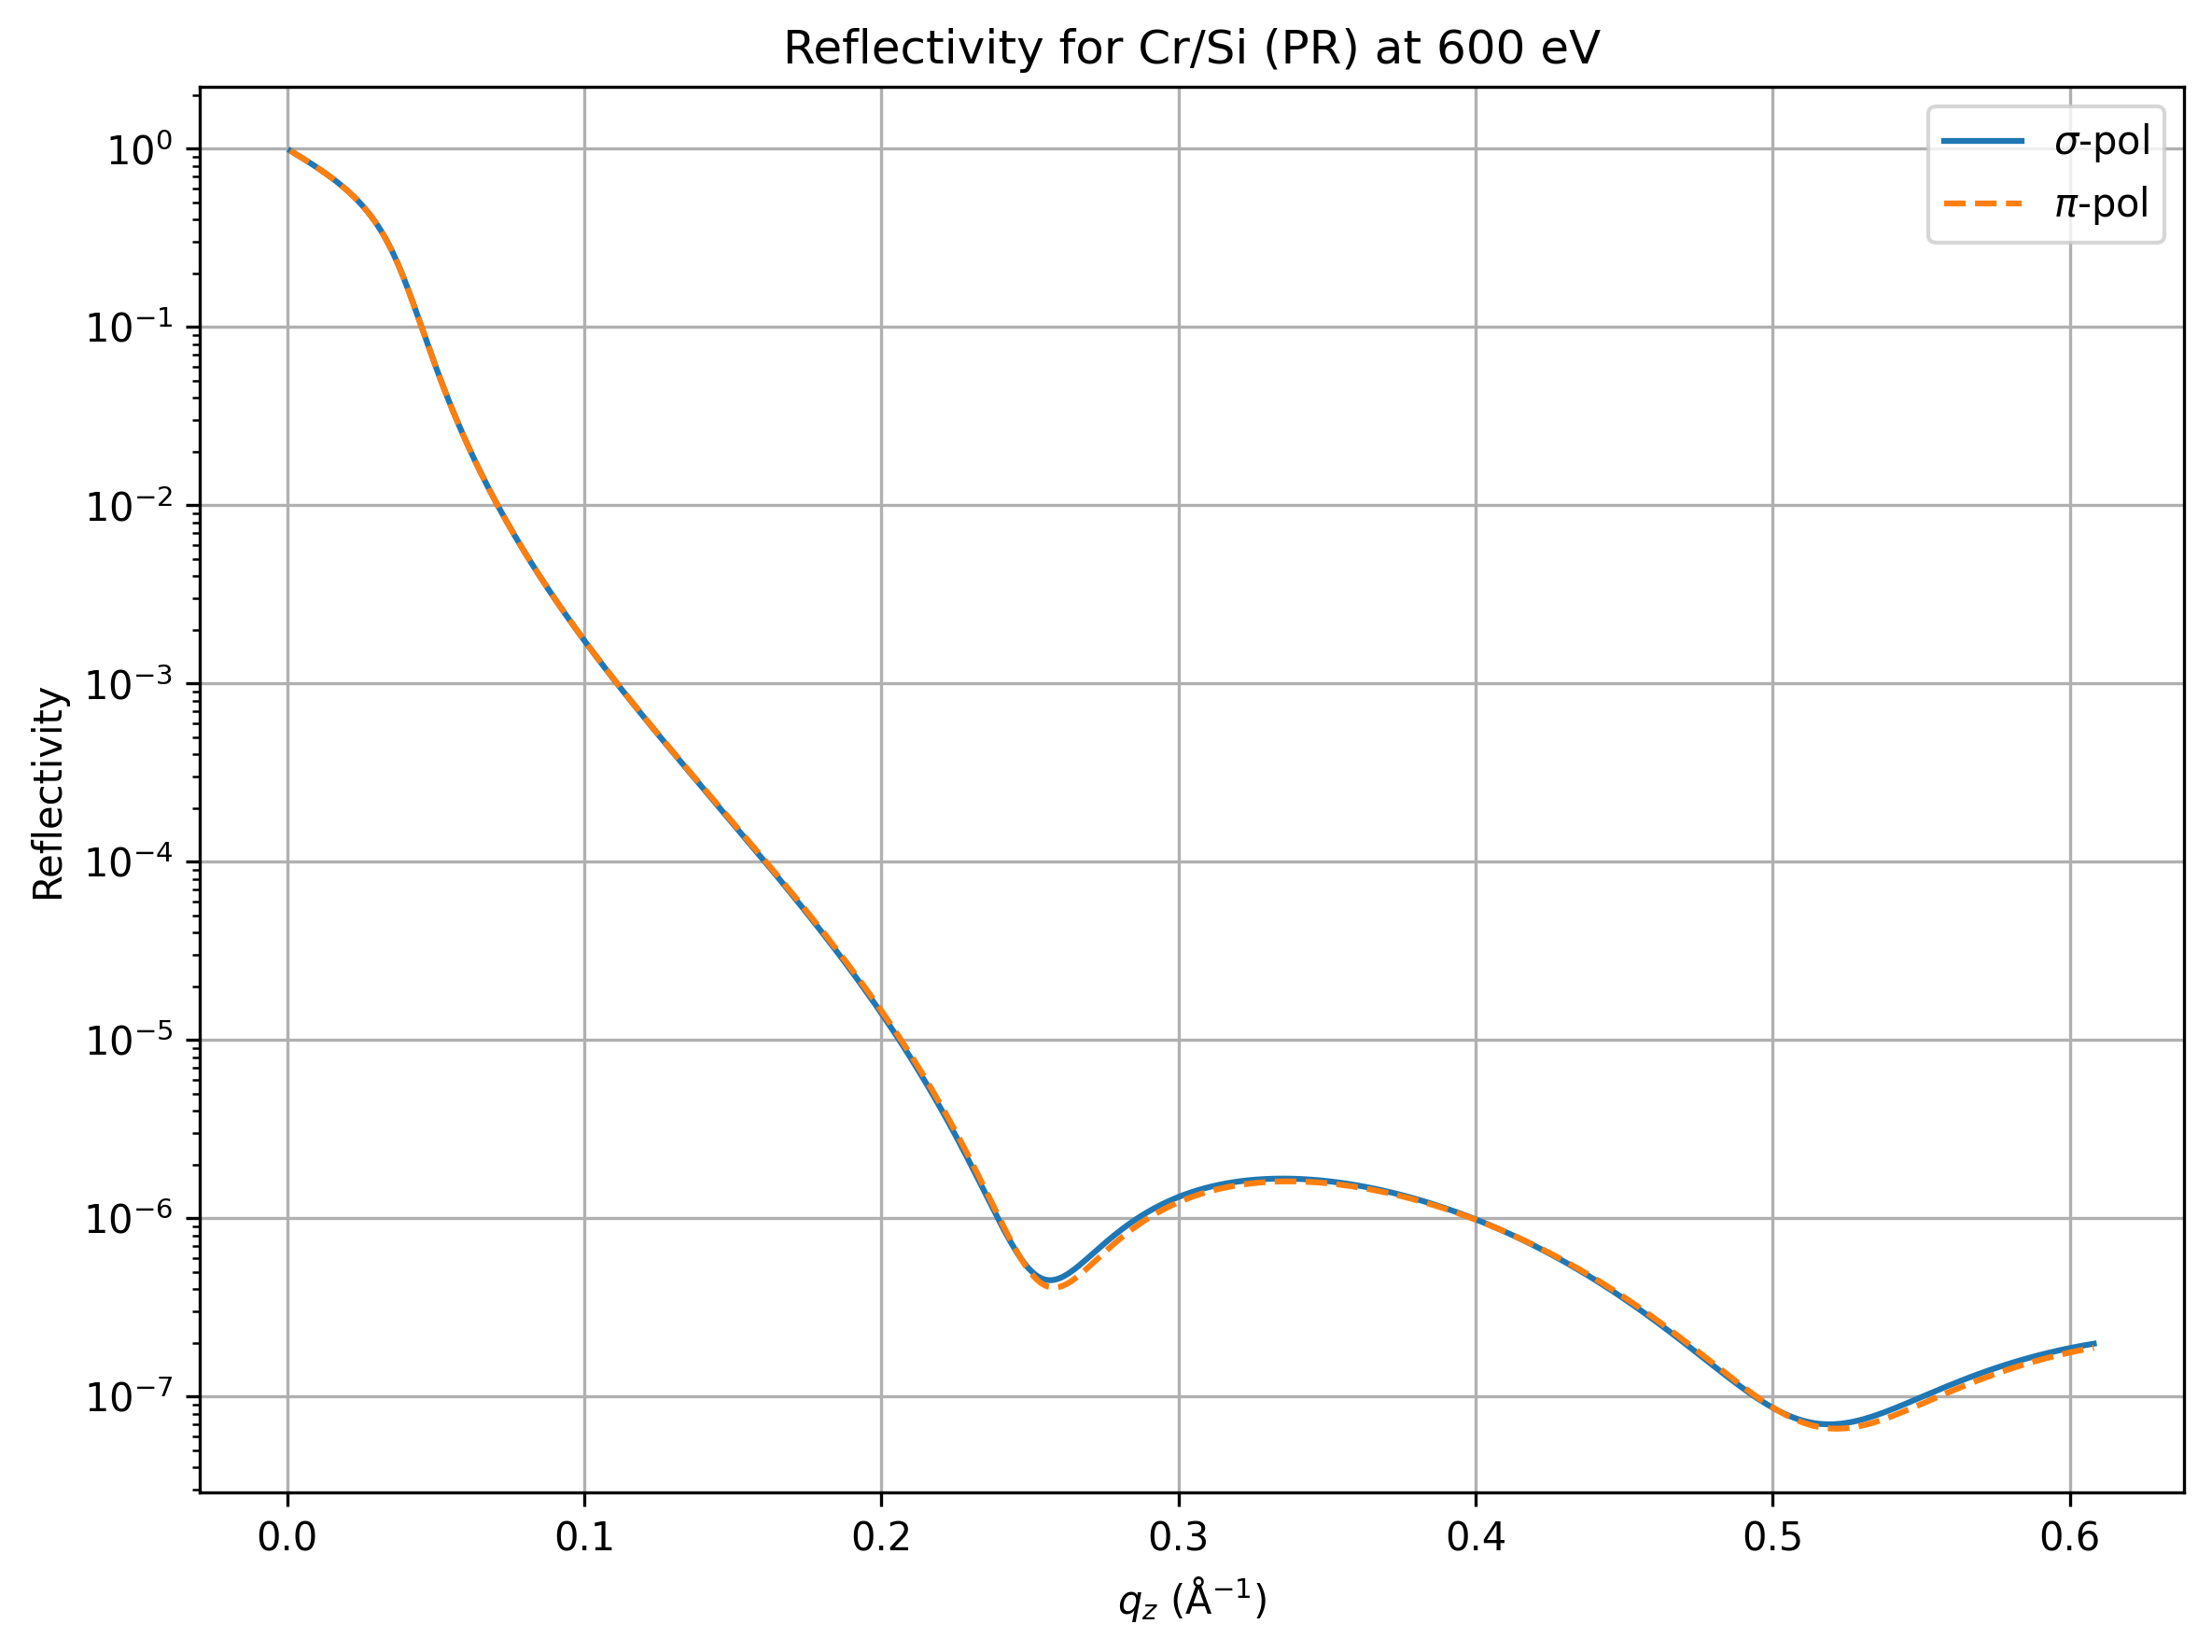

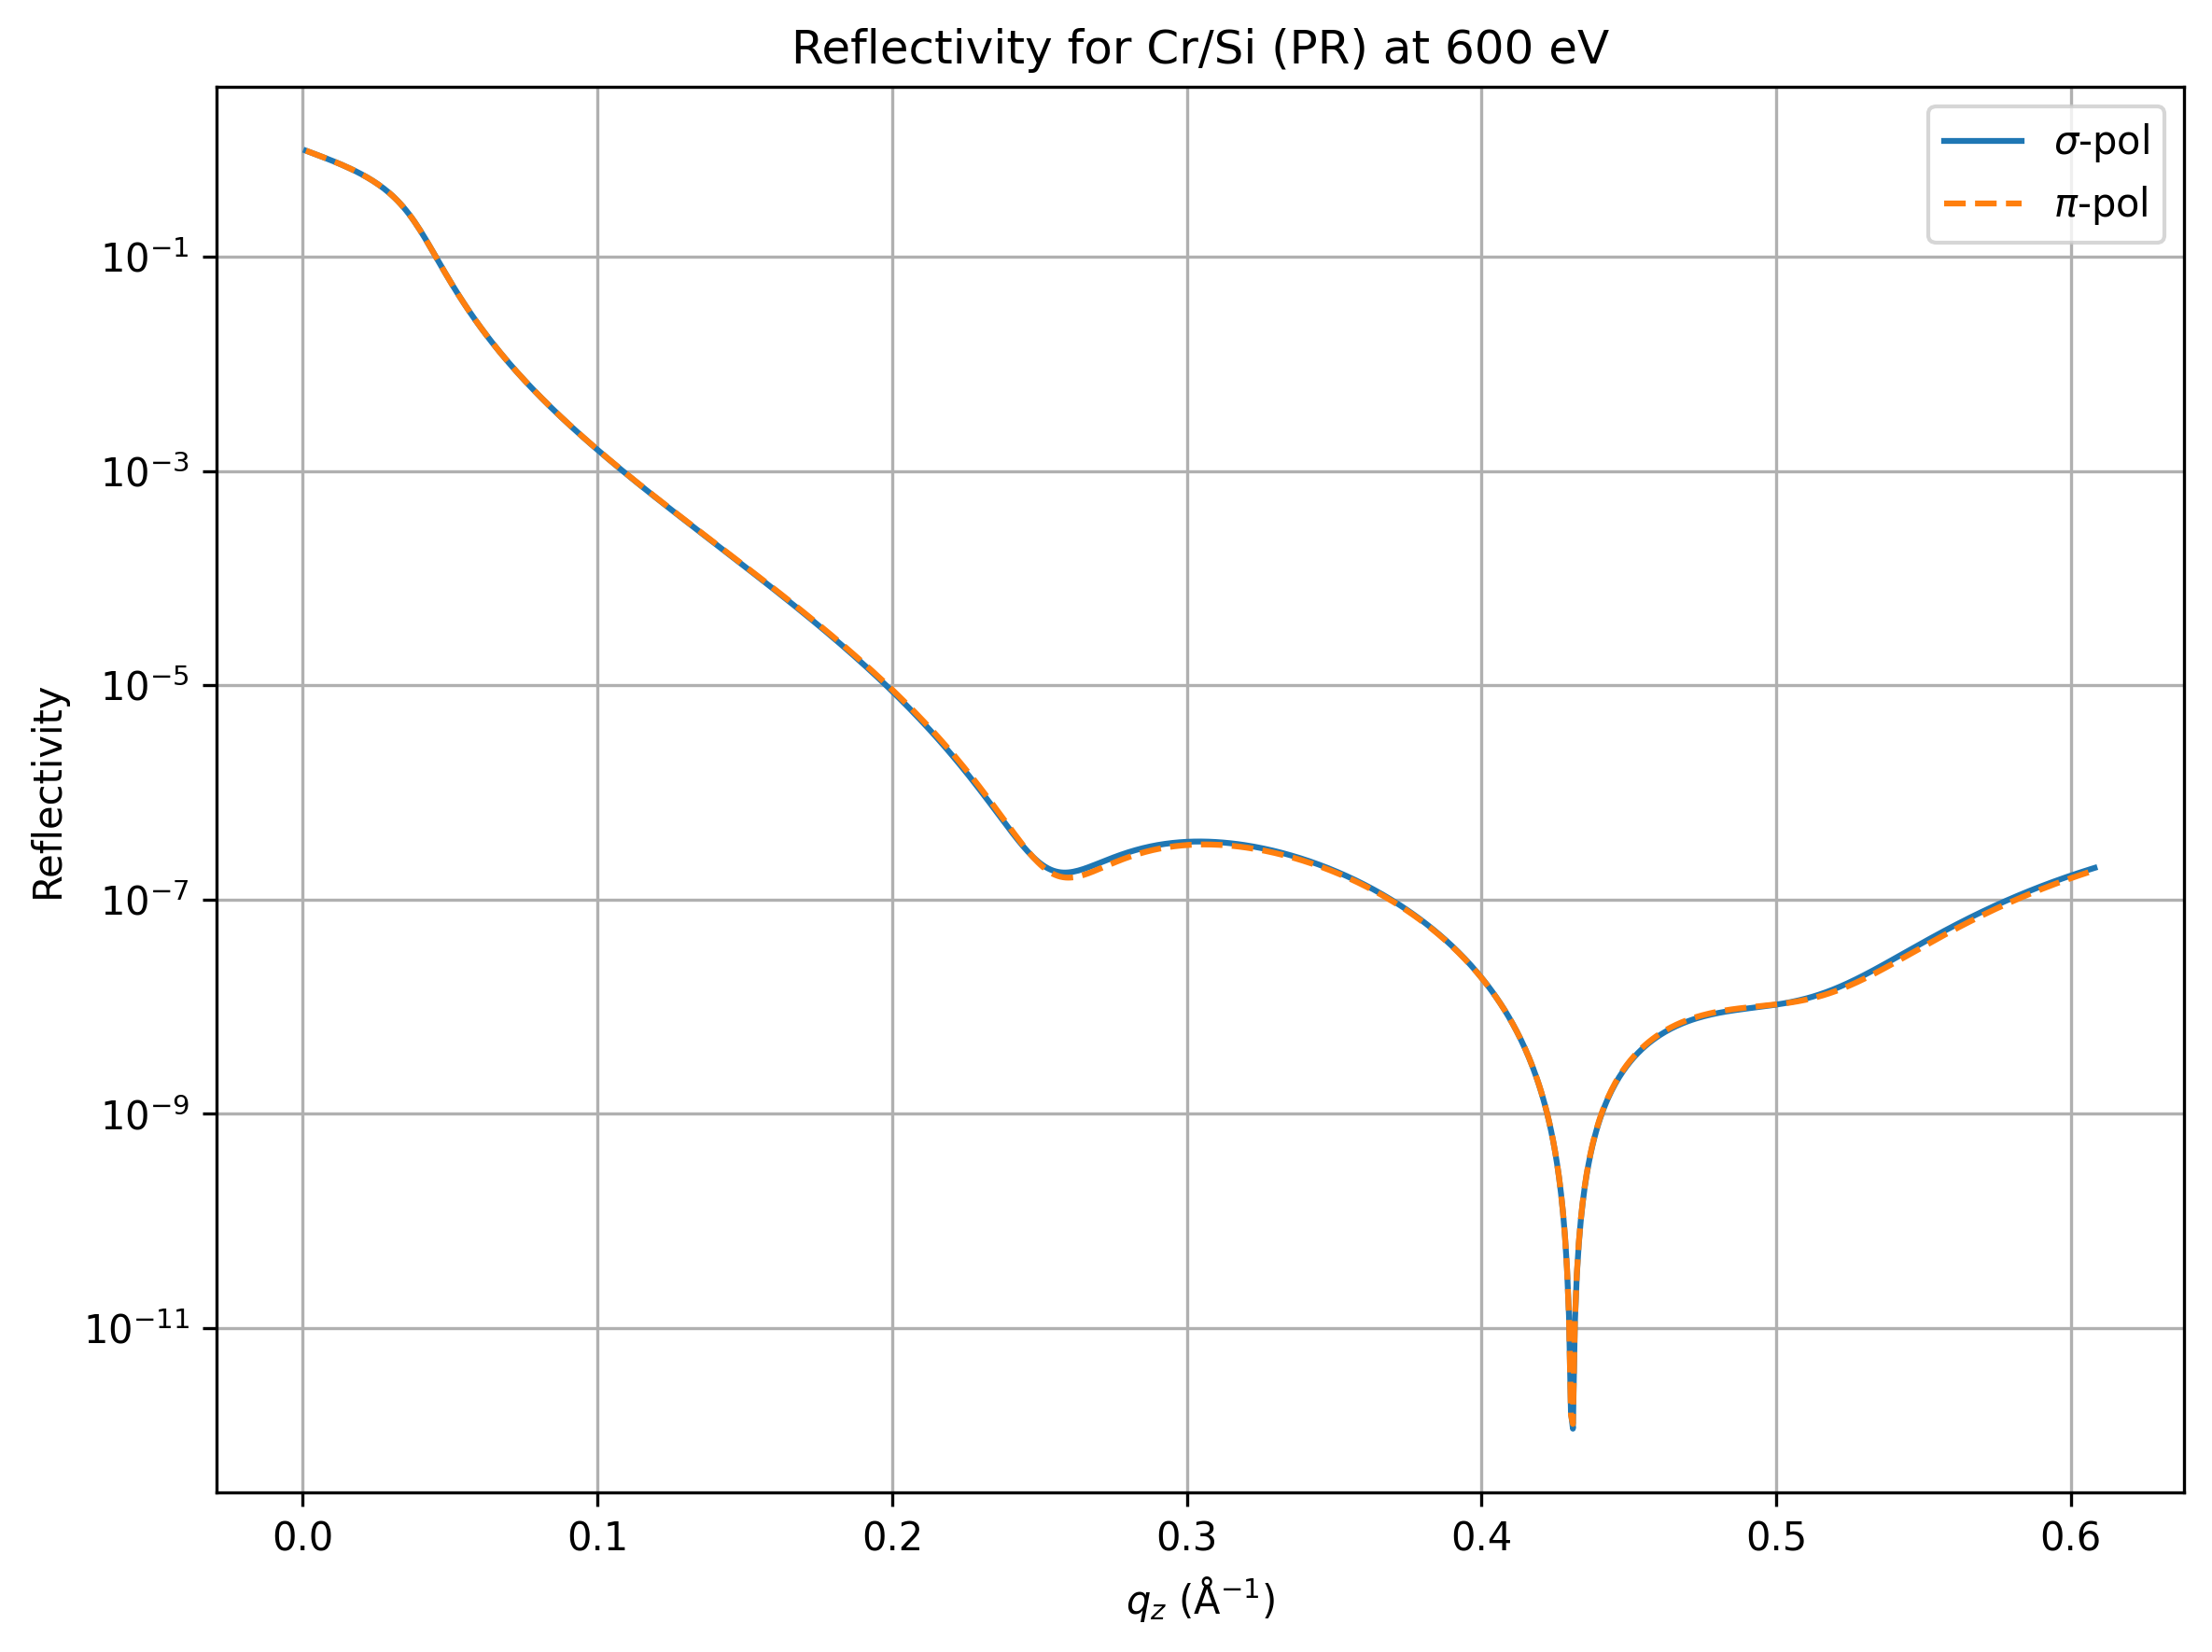

In [13]:
file_path = "/Users/niaggar/Developer/mitacs/reflectivity_test_data.txt"
data = np.loadtxt(file_path)
qz, R_Sgo, R_Pgo = data.T

plot_reflectivity(qz, R_Sgo, res.R_s, E_eV, "Cr/Si (PR)")
plot_reflectivity(qz, R_Pgo, res.R_p, E_eV, "Cr/Si (PR)")